# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weather_api_key)

54788692a117b086dd710710d6ba3e29


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 6.3542, 'lat': 59.6506},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 279.82,
  'feels_like': 277.9,
  'temp_min': 279.82,
  'temp_max': 279.82,
  'pressure': 997,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 2.67, 'deg': 67, 'gust': 2.74},
 'clouds': {'all': 100},
 'dt': 1620271826,
 'sys': {'type': 3,
  'id': 2003794,
  'country': 'NO',
  'sunrise': 1620271247,
  'sunset': 1620330093},
 'timezone': 7200,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=54788692a117b086dd710710d6ba3e29&units=imperial&q='

In [7]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
cityname = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cityname.append(city)
        print(city)
    except:
        print("City not Found")

ayolas
berlevag
punta arenas
puerto ayora
arraial do cabo
rikitea
albany
weinan
bambous virieux
port alfred
coahuayana
adrar
jamestown
hambantota
bethel
kodiak
City not Found
ushuaia
vaini
hirara
City not Found
hobart
hilo
luderitz
City not Found
da nang
atuona
saint-philippe
port elizabeth
ahipara
yellowknife
uthal
skjervoy
saskylakh
mataura
nemuro
busselton
severo-kurilsk
eenhana
waipawa
laguna
torbay
east london
kaitangata
butaritari
carutapera
salinopolis
kachiry
komsomolskiy
oranjestad
naranjal
saldanha
esperance
bilibino
tasiilaq
pacific grove
souillac
dwarka
hoi an
nikolskoye
barrow
bathsheba
quatre cocos
vestmannaeyjar
hermanus
west wendover
provideniya
fallon
burnie
mahebourg
foumban
City not Found
tuktoyaktuk
kruisfontein
castro
kavieng
carballo
koumac
huarmey
richards bay
cherskiy
halifax
City not Found
edd
tabou
san cristobal
rabo de peixe
samarai
nabire
vila velha
brejo da madre de deus
ribeira grande
petropavlovsk-kamchatskiy
plymouth
cape town
cidreira
krasnoarmeysk
sant

In [11]:
weather_df = pd.DataFrame({"City Name":cityname,
                          "Country":country,
                          "Date": date,
                          "Latitude": lat,
                          "Longitude": lng,
                          "Temperature": temp,
                          "Cloudiness": cloudiness,
                          "Humidity": humidity,
                          "Wind Speed": wind_speed,})
weather_df

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
0,ayolas,PY,1620271830,-27.4000,-56.9000,52.65,100,95,10.42
1,berlevag,NO,1620271830,70.8578,29.0864,32.00,90,86,3.44
2,punta arenas,CL,1620271800,-53.1500,-70.9167,44.29,0,87,13.80
3,puerto ayora,EC,1620271831,-0.7393,-90.3518,75.00,2,93,5.99
4,arraial do cabo,BR,1620271831,-22.9661,-42.0278,72.72,0,85,5.39
...,...,...,...,...,...,...,...,...,...
548,belaya gora,RU,1620271996,68.5333,146.4167,33.28,100,97,6.51
549,lenina,RU,1620271996,46.0667,39.7833,46.00,72,73,10.04
550,artyom,AZ,1620271997,40.4723,50.3330,55.40,0,71,6.91
551,baglan,AF,1620271997,36.1307,68.7083,71.26,98,62,2.06


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_df.loc[weather_df["Humidity"]> 100]

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

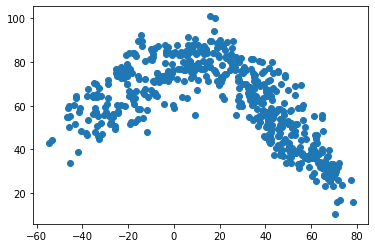

In [16]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"] )
plt.show()

## Latitude vs. Humidity Plot

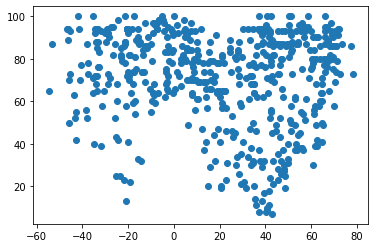

In [17]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"] )
plt.show()

## Latitude vs. Cloudiness Plot

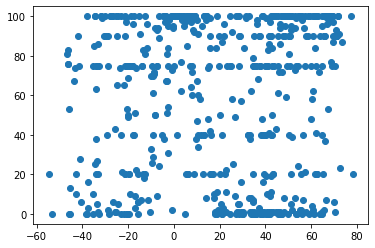

In [18]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"] )
plt.show()

## Latitude vs. Wind Speed Plot

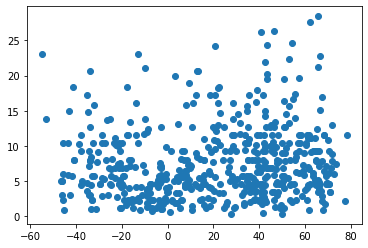

In [19]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"] )
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression